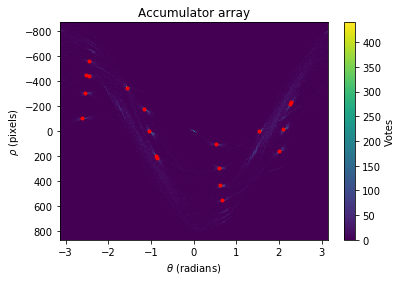

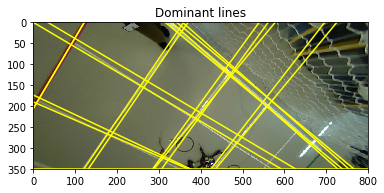

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from common import *

# This bit of code is from HW1.
edge_threshold = 0.015
blur_sigma     = 1
filename       = '../data/grid.jpg'
I_rgb          = plt.imread(filename)
I_rgb          = im2double(I_rgb) #Ensures that the image is in floating-point with pixel values in [0,1].
I_gray         = rgb_to_gray(I_rgb)
Ix, Iy, Im     = derivative_of_gaussian(I_gray, sigma=blur_sigma) # See HW1 Task 3.6
x,y,theta      = extract_edges(Ix, Iy, Im, edge_threshold)

# You can adjust these for better results
line_threshold = 0.2
N_rho          = 200
N_theta        = 200

###########################################
#
# Task 2.1: Determine appropriate ranges
#
###########################################
# Tip: theta is computed using np.arctan2. Check that the
# range of values returned by arctan2 matches your chosen
# ranges (check np.info(np.arctan2) or the internet docs).

#Rho range between [-+ squareroot of (M^2 + N^2) ] where MxN is the image resolution
rho_max   = np.sqrt(I_rgb.shape[0]**2 + I_rgb.shape[1]**2)
rho_min   = -np.sqrt(I_rgb.shape[0]**2 + I_rgb.shape[1]**2)


#Theta range anything that makes abs(theta_max - theta_min) = 2*pi
theta_min = -np.pi
theta_max = np.pi

###########################################
#
# Task 2.2: Compute the accumulator array
#
###########################################
# Zero-initialize an array to hold our votes
H   = np.zeros((N_rho, N_theta))

# 1) Compute rho for each edge (x,y,theta)
# Tip: You can do this without for-loops

#thetas = np.linspace(theta_min, theta_max, x.shape[0])   <----- FUCKED ME OVER
rhos  = x*np.cos(theta) + y*np.sin(theta)


# 2) Convert to discrete row,column coordinates
# Tip: Use np.floor(...).astype(np.int) to floor a number to an integer type
row    = np.floor(N_rho * (rhos-rho_min)/(rho_max-rho_min)).astype(np.uint32)
column = np.floor(N_theta * (theta-theta_min)/(theta_max-theta_min)).astype(np.uint32)


# 3) Increment H[row,column]
# Tip: Make sure that you don't try to access values at indices outside
# the valid range: [0,N_rho-1] and [0,N_theta-1]
for r,c in zip(row, column):
    if c == 200:
        continue
    H[r,c] += 1 #votes


###########################################
#
# Task 2.3: Extract local maxima
#
###########################################
# 1) Call extract_local_maxima, returns (row,column)
rows_max, columns_max = extract_local_maxima(H, 0.2) 

# 2) Convert (row, column) back to (rho, theta)
maxima_rho = ((rows_max)* (rho_max - rho_min) / N_rho)  + rho_min 
maxima_theta = ((columns_max)*(theta_max - theta_min) / N_theta)  + theta_min


###########################################
#
# Figure 2.2: Display the accumulator array and local maxima
#
###########################################
plt.figure()
plt.imshow(H, extent=[theta_min, theta_max, rho_max, rho_min], aspect='auto')
plt.colorbar(label='Votes')
plt.scatter(maxima_theta, maxima_rho, marker='.', color='red')
plt.title('Accumulator array')
plt.xlabel('$\\theta$ (radians)')
plt.ylabel('$\\rho$ (pixels)')
#plt.savefig('out_array.png', bbox_inches='tight', pad_inches=0) # Uncomment to save figure

###########################################
#
# Figure 2.3: Draw the lines back onto the input image
#
###########################################
plt.figure()
plt.imshow(I_rgb)
plt.xlim([0, I_rgb.shape[1]])
plt.ylim([I_rgb.shape[0], 0])
for theta,rho in zip(maxima_theta,maxima_rho):
    draw_line(theta, rho, color='yellow')
plt.title('Dominant lines')
#plt.savefig('out_lines.png', bbox_inches='tight', pad_inches=0) # Uncomment to save figure


plt.show()


(19,)